# Yvette_workbook Anomaly Detection Project

In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns
import env

The dataset for these exercises lives in the Codeup Data Science MySQL Server. The database name is curriculum_logs.
Hint: You will need to explore the database (yay SQL!)

1. Label students by the program they are in.

2. Is it possible to identify the user_id of a staff member?

3. Identify students who are accessing our curriculum pages beyond the end of their time at Codeup.

4. Identify students who present anomalous activity using the Bollinger Band method, but reduce K to 2.

5. Plot the access activity of these students.

BONUS: Can you identify users who are viewing both the web dev and data science curriculum?

### Acquire

In [2]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/curriculum_logs'
query = '''
SELECT *
FROM logs
LEFT JOIN cohorts ON cohorts.id= logs.cohort_id
'''
df = pd.read_sql(query, url)
df.head(20)

date      time                                               path  \
0   2018-01-26  09:55:03                                                  /   
1   2018-01-26  09:56:02                                            java-ii   
2   2018-01-26  09:56:05                java-ii/object-oriented-programming   
3   2018-01-26  09:56:06                 slides/object_oriented_programming   
4   2018-01-26  09:56:24                          javascript-i/conditionals   
5   2018-01-26  09:56:41                                 javascript-i/loops   
6   2018-01-26  09:56:46                          javascript-i/conditionals   
7   2018-01-26  09:56:48                             javascript-i/functions   
8   2018-01-26  09:56:59                                 javascript-i/loops   
9   2018-01-26  09:58:26                             javascript-i/functions   
10  2018-01-26  09:59:22                           mkdocs/search_index.json   
11  2018-01-26  10:00:02  javascript-i/introduction/working-with-data-ty...   
12  2018-01-26  10:00:37                                                  /   
13  2018-01-26  10:00:39                                       javascript-i   
14  2018-01-26  10:00:44  javascript-i/introduction/working-with-data-ty...   
15  2018-01-26  10:00:49                javascript-i/introduction/variables   
16  2018-01-26  10:00:57                javascript-i/introduction/operators   
17  2018-01-26  10:01:12  javascript-i/introduction/working-with-data-ty...   
18  2018-01-26  10:02:02                             javascript-i/functions   
19  2018-01-26  10:02:21                             javascript-i/functions   

    user_id  cohort_id            ip    id     name     slack  start_date  \
0         1        8.0  97.105.19.61   8.0  Hampton  #hampton  2015-09-22   
1         1        8.0  97.105.19.61   8.0  Hampton  #hampton  2015-09-22   
2         1        8.0  97.105.19.61   8.0  Hampton  #hampton  2015-09-22   
3         1        8.0  97.105.19.61   8.0  Hampton  #hampton  2015-09-22   
4         2       22.0  97.105.19.61  22.0    Teddy    #teddy  2018-01-08   
5         2       22.0  97.105.19.61  22.0    Teddy    #teddy  2018-01-08   
6         3       22.0  97.105.19.61  22.0    Teddy    #teddy  2018-01-08   
7         3       22.0  97.105.19.61  22.0    Teddy    #teddy  2018-01-08   
8         2       22.0  97.105.19.61  22.0    Teddy    #teddy  2018-01-08   
9         4       22.0  97.105.19.61  22.0    Teddy    #teddy  2018-01-08   
10        5       22.0  97.105.19.61  22.0    Teddy    #teddy  2018-01-08   
11        6       22.0  97.105.19.61  22.0    Teddy    #teddy  2018-01-08   
12        6       22.0  97.105.19.61  22.0    Teddy    #teddy  2018-01-08   
13        6       22.0  97.105.19.61  22.0    Teddy    #teddy  2018-01-08   
14        6       22.0  97.105.19.61  22.0    Teddy    #teddy  2018-01-08   
15        6       22.0  97.105.19.61  22.0    Teddy    #teddy  2018-01-08   
16        6       22.0  97.105.19.61  22.0    Teddy    #teddy  2018-01-08   
17        6       22.0  97.105.19.61  22.0    Teddy    #teddy  2018-01-08   
18        7       22.0  97.105.19.61  22.0    Teddy    #teddy  2018-01-08   
19        8       22.0  97.105.19.61  22.0    Teddy    #teddy  2018-01-08   

      end_date           created_at           updated_at deleted_at  \
0   2016-02-06  2016-06-14 19:52:26  2016-06-14 19:52:26       None   
1   2016-02-06  2016-06-14 19:52:26  2016-06-14 19:52:26       None   
2   2016-02-06  2016-06-14 19:52:26  2016-06-14 19:52:26       None   
3   2016-02-06  2016-06-14 19:52:26  2016-06-14 19:52:26       None   
4   2018-05-17  2018-01-08 13:59:10  2018-01-08 13:59:10       None   
5   2018-05-17  2018-01-08 13:59:10  2018-01-08 13:59:10       None   
6   2018-05-17  2018-01-08 13:59:10  2018-01-08 13:59:10       None   
7   2018-05-17  2018-01-08 13:59:10  2018-01-08 13:59:10       None   
8   2018-05-17  2018-01-08 13:59:10  2018-01-08 13:59:10       None   
9   2018-05-17  2018-0

In [3]:
df.shape

(900223, 15)

In [4]:
df.head(20)

date      time                                               path  \
0   2018-01-26  09:55:03                                                  /   
1   2018-01-26  09:56:02                                            java-ii   
2   2018-01-26  09:56:05                java-ii/object-oriented-programming   
3   2018-01-26  09:56:06                 slides/object_oriented_programming   
4   2018-01-26  09:56:24                          javascript-i/conditionals   
5   2018-01-26  09:56:41                                 javascript-i/loops   
6   2018-01-26  09:56:46                          javascript-i/conditionals   
7   2018-01-26  09:56:48                             javascript-i/functions   
8   2018-01-26  09:56:59                                 javascript-i/loops   
9   2018-01-26  09:58:26                             javascript-i/functions   
10  2018-01-26  09:59:22                           mkdocs/search_index.json   
11  2018-01-26  10:00:02  javascript-i/introduction/working-with-data-ty...   
12  2018-01-26  10:00:37                                                  /   
13  2018-01-26  10:00:39                                       javascript-i   
14  2018-01-26  10:00:44  javascript-i/introduction/working-with-data-ty...   
15  2018-01-26  10:00:49                javascript-i/introduction/variables   
16  2018-01-26  10:00:57                javascript-i/introduction/operators   
17  2018-01-26  10:01:12  javascript-i/introduction/working-with-data-ty...   
18  2018-01-26  10:02:02                             javascript-i/functions   
19  2018-01-26  10:02:21                             javascript-i/functions   

    user_id  cohort_id            ip    id     name     slack  start_date  \
0         1        8.0  97.105.19.61   8.0  Hampton  #hampton  2015-09-22   
1         1        8.0  97.105.19.61   8.0  Hampton  #hampton  2015-09-22   
2         1        8.0  97.105.19.61   8.0  Hampton  #hampton  2015-09-22   
3         1        8.0  97.105.19.61   8.0  Hampton  #hampton  2015-09-22   
4         2       22.0  97.105.19.61  22.0    Teddy    #teddy  2018-01-08   
5         2       22.0  97.105.19.61  22.0    Teddy    #teddy  2018-01-08   
6         3       22.0  97.105.19.61  22.0    Teddy    #teddy  2018-01-08   
7         3       22.0  97.105.19.61  22.0    Teddy    #teddy  2018-01-08   
8         2       22.0  97.105.19.61  22.0    Teddy    #teddy  2018-01-08   
9         4       22.0  97.105.19.61  22.0    Teddy    #teddy  2018-01-08   
10        5       22.0  97.105.19.61  22.0    Teddy    #teddy  2018-01-08   
11        6       22.0  97.105.19.61  22.0    Teddy    #teddy  2018-01-08   
12        6       22.0  97.105.19.61  22.0    Teddy    #teddy  2018-01-08   
13        6       22.0  97.105.19.61  22.0    Teddy    #teddy  2018-01-08   
14        6       22.0  97.105.19.61  22.0    Teddy    #teddy  2018-01-08   
15        6       22.0  97.105.19.61  22.0    Teddy    #teddy  2018-01-08   
16        6       22.0  97.105.19.61  22.0    Teddy    #teddy  2018-01-08   
17        6       22.0  97.105.19.61  22.0    Teddy    #teddy  2018-01-08   
18        7       22.0  97.105.19.61  22.0    Teddy    #teddy  2018-01-08   
19        8       22.0  97.105.19.61  22.0    Teddy    #teddy  2018-01-08   

      end_date           created_at           updated_at deleted_at  \
0   2016-02-06  2016-06-14 19:52:26  2016-06-14 19:52:26       None   
1   2016-02-06  2016-06-14 19:52:26  2016-06-14 19:52:26       None   
2   2016-02-06  2016-06-14 19:52:26  2016-06-14 19:52:26       None   
3   2016-02-06  2016-06-14 19:52:26  2016-06-14 19:52:26       None   
4   2018-05-17  2018-01-08 13:59:10  2018-01-08 13:59:10       None   
5   2018-05-17  2018-01-08 13:59:10  2018-01-08 13:59:10       None   
6   2018-05-17  2018-01-08 13:59:10  2018-01-08 13:59:10       None   
7   2018-05-17  2018-01-08 13:59:10  2018-01-08 13:59:10       None   
8   2018-05-17  2018-01-08 13:59:10  2018-01-08 13:59:10       None   
9   2018-05-17  2018-0

In [5]:
df[df.cohort_id.isnull()]

date      time                                   path  user_id  \
411     2018-01-26  16:46:16                                      /       48   
412     2018-01-26  16:46:24  spring/extra-features/form-validation       48   
425     2018-01-26  17:54:24                                      /       48   
435     2018-01-26  18:32:03                                      /       48   
436     2018-01-26  18:32:17              mysql/relationships/joins       48   
...            ...       ...                                    ...      ...   
899897  2021-04-21  12:49:00                          javascript-ii      717   
899898  2021-04-21  12:49:02                      javascript-ii/es6      717   
899899  2021-04-21  12:51:27        javascript-ii/map-filter-reduce      717   
899900  2021-04-21  12:52:37                 javascript-ii/promises      717   
899902  2021-04-21  12:56:26              javascript-ii/RESTful-api      717   

        cohort_id              ip  id  name slack start_date end_date  \
411           NaN    97.105.19.61 NaN  None  None       None     None   
412           NaN    97.105.19.61 NaN  None  None       None     None   
425           NaN    97.105.19.61 NaN  None  None       None     None   
435           NaN    97.105.19.61 NaN  None  None       None     None   
436           NaN    97.105.19.61 NaN  None  None       None     None   
...           ...             ...  ..   ...   ...        ...      ...   
899897        NaN  136.50.102.126 NaN  None  None       None     None   
899898        NaN  136.50.102.126 NaN  None  None       None     None   
899899        NaN  136.50.102.126 NaN  None  None       None     None   
899900        NaN  136.50.102.126 NaN  None  None       None     None   
899902        NaN  136.50.102.126 NaN  None  None       None     None   

       created_at updated_at deleted_at  program_id  
411          None       None       None         NaN  
412          None       None       None         NaN  
425          None       None       None         NaN  
435          None       None       None         NaN  
436          None       None       None         NaN  
...           ...        ...        ...         ...  
899897       None       None       None         NaN  
899898       None       None       None         NaN  
899899       None       None       None         NaN  
899900       None       None       None         NaN  
899902       None       None       None         NaN  

[52893 rows x 15 columns]

### Prepare

In [6]:
df.date = pd.to_datetime(df.date)
df = df.set_index(df.date)
pages = df['path'].resample('d').count()
pages.head()

date
2018-01-26    572
2018-01-27    230
2018-01-28    170
2018-01-29    830
2018-01-30    652
Freq: D, Name: path, dtype: int64

### Label Program Name

In [7]:
df.program_id.value_counts()

2.0    713365
3.0    103412
1.0     30548
4.0         5
Name: program_id, dtype: int64

In [8]:
df['program_name']= df.program_id

In [9]:
df.program_name = df.program_name.replace({1.0:'full_stack_php',2.0:'full_stack_java',3.0:'data_science',4.0:'front_end'})

In [10]:
df

date      time  \
date                              
2018-01-26 2018-01-26  09:55:03   
2018-01-26 2018-01-26  09:56:02   
2018-01-26 2018-01-26  09:56:05   
2018-01-26 2018-01-26  09:56:06   
2018-01-26 2018-01-26  09:56:24   
...               ...       ...   
2021-04-21 2021-04-21  16:41:51   
2021-04-21 2021-04-21  16:42:02   
2021-04-21 2021-04-21  16:42:09   
2021-04-21 2021-04-21  16:44:37   
2021-04-21 2021-04-21  16:44:39   

                                                        path  user_id  \
date                                                                    
2018-01-26                                                 /        1   
2018-01-26                                           java-ii        1   
2018-01-26               java-ii/object-oriented-programming        1   
2018-01-26                slides/object_oriented_programming        1   
2018-01-26                         javascript-i/conditionals        2   
...                                                      ...      ...   
2021-04-21                              jquery/personal-site       64   
2021-04-21                                 jquery/mapbox-api       64   
2021-04-21                           jquery/ajax/weather-map       64   
2021-04-21  anomaly-detection/discrete-probabilistic-methods      744   
2021-04-21                                 jquery/mapbox-api       64   

            cohort_id             ip    id     name     slack  start_date  \
date                                                                        
2018-01-26        8.0   97.105.19.61   8.0  Hampton  #hampton  2015-09-22   
2018-01-26        8.0   97.105.19.61   8.0  Hampton  #hampton  2015-09-22   
2018-01-26        8.0   97.105.19.61   8.0  Hampton  #hampton  2015-09-22   
2018-01-26        8.0   97.105.19.61   8.0  Hampton  #hampton  2015-09-22   
2018-01-26       22.0   97.105.19.61  22.0    Teddy    #teddy  2018-01-08   
...               ...            ...   ...      ...       ...         ...   
2021-04-21       28.0  71.150.217.33  28.0    Staff         #  2014-02-04   
2021-04-21       28.0  71.150.217.33  28.0    Staff         #  2014-02-04   
2021-04-21       28.0  71.150.217.33  28.0    Staff         #  2014-02-04   
2021-04-21       28.0  24.160.137.86  28.0    Staff         #  2014-02-04   
2021-04-21       28.0  71.150.217.33  28.0    Staff         #  2014-02-04   

              end_date           created_at           updated_at deleted_at  \
date                                                                          
2018-01-26  2016-02-06  2016-06-14 19:52:26  2016-06-14 19:52:26       None   
2018-01-26  2016-02-06  2016-06-14 19:52:26  2016-06-14 19:52:26       None   
2018-01-26  2016-02-06  2016-06-14 19:52:26  2016-06-14 19:52:26       None   
2018-01-26  2016-02-06  2016-06-14 19:52:26  2016-06-14 19:52:26       None   
2018-01-26  2018-05-17  2018-01-08 13:59:10  2018-01-08 13:59:10       None   
...                ...                  ...                  ...        ...   
2021-04-21  2014-02-04  2018-12-06 17:04:19  2018-12-06 17:04:19       None   
2021-04-21  2014-02-04  2018-12-06 17:04:19  2018-12-06 17:04:19       None   
2021-04-21  2014-02-04  2018-12-06 17:04:19  2018-12-06 17:04:19       None   
2021-04-21  2014-02-04  2018-12-06 17:04:19  2018-12-06 17:04:19       None   
2021-04-21  2014-02-04  2018-12-06 17:04:19  2018-12-06 17:04:19       None   

            program_id     program_name  
date                                     
2018-01-26         1.0   full_stack_php  
2018-01-26         1.0   full_stack_php  
2018-01-26         1.0   full_stack_php  
2018-01-26         1.0   full_stack_php  
2018-01-26         2.0  full_stack_java  
...                ...              ...  
2021-04-21         2.0  full_stack_java  
2021-04-21         2.0  full_stack_java  
2021-04-21         2.0  full_stack_java  
2021-04-21         2.0  full_stack_java  
2021-04-21         2.0  full_stack_java  

[900223 rows x 16 columns]

In [11]:
df.to_csv('curriculum_logs_edited.csv', index=False)

# 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

### ID Staff Members

In [12]:
df[df.name =='Staff']

date      time  \
date                              
2018-12-06 2018-12-06  14:15:29   
2018-12-06 2018-12-06  14:25:40   
2018-12-06 2018-12-06  14:25:41   
2018-12-06 2018-12-06  15:31:29   
2018-12-06 2018-12-06  15:31:33   
...               ...       ...   
2021-04-21 2021-04-21  16:41:51   
2021-04-21 2021-04-21  16:42:02   
2021-04-21 2021-04-21  16:42:09   
2021-04-21 2021-04-21  16:44:37   
2021-04-21 2021-04-21  16:44:39   

                                                         path  user_id  \
date                                                                     
2018-12-06  appendix/further-reading/java/intellij-tomcat-...       53   
2018-12-06                                       javascript-i      314   
2018-12-06                        javascript-i/coffee-project      314   
2018-12-06                                             spring       40   
2018-12-06                       spring/fundamentals/security       40   
...                                                       ...      ...   
2021-04-21                               jquery/personal-site       64   
2021-04-21                                  jquery/mapbox-api       64   
2021-04-21                            jquery/ajax/weather-map       64   
2021-04-21   anomaly-detection/discrete-probabilistic-methods      744   
2021-04-21                                  jquery/mapbox-api       64   

            cohort_id               ip    id   name slack  start_date  \
date                                                                    
2018-12-06       28.0     97.105.19.58  28.0  Staff     #  2014-02-04   
2018-12-06       28.0     97.105.19.58  28.0  Staff     #  2014-02-04   
2018-12-06       28.0     97.105.19.58  28.0  Staff     #  2014-02-04   
2018-12-06       28.0  170.248.173.247  28.0  Staff     #  2014-02-04   
2018-12-06       28.0  170.248.173.247  28.0  Staff     #  2014-02-04   
...               ...              ...   ...    ...   ...         ...   
2021-04-21       28.0    71.150.217.33  28.0  Staff     #  2014-02-04   
2021-04-21       28.0    71.150.217.33  28.0  Staff     #  2014-02-04   
2021-04-21       28.0    71.150.217.33  28.0  Staff     #  2014-02-04   
2021-04-21       28.0    24.160.137.86  28.0  Staff     #  2014-02-04   
2021-04-21       28.0    71.150.217.33  28.0  Staff     #  2014-02-04   

              end_date           created_at           updated_at deleted_at  \
date                                                                          
2018-12-06  2014-02-04  2018-12-06 17:04:19  2018-12-06 17:04:19       None   
2018-12-06  2014-02-04  2018-12-06 17:04:19  2018-12-06 17:04:19       None   
2018-12-06  2014-02-04  2018-12-06 17:04:19  2018-12-06 17:04:19       None   
2018-12-06  2014-02-04  2018-12-06 17:04:19  2018-12-06 17:04:19       None   
2018-12-06  2014-02-04  2018-12-06 17:04:19  2018-12-06 17:04:19       None   
...                ...                  ...                  ...        ...   
2021-04-21  2014-02-04  2018-12-06 17:04:19  2018-12-06 17:04:19       None   
2021-04-21  2014-02-04  2018-12-06 17:04:19  2018-12-06 17:04:19       None   
2021-04-21  2014-02-04  2018-12-06 17:04:19  2018-12-06 17:04:19       None   
2021-04-21  2014-02-04  2018-12-06 17:04:19  2018-12-06 17:04:19       None   
2021-04-21  2014-02-04  2018-12-06 17:04:19  2018-12-06 17:04:19       None   

            program_id     program_name  
date                                     
2018-12-06         2.0  full_stack_java  
2018-12-06         2.0  full_stack_java  
2018-12-06         2.0  full_stack_java  
2018-12-06         2.0  full_stack_java  
2018-12-06         2.0  full_stack_java  
...                ...              ...  
2021-04-21         2.0  full_stack_java  
2021-04-21         2.0  full_stack_java  
2021-04-21         2.0  full_stack_java  
2021-04-21         2.0  full_stack_java  
2021-04-21         2.0  full_stack_java  

[84031 rows x 16 columns]

### ID students accessing curriculumn pass the end date of program

In [13]:
# create dataframe for just students both current and graduates
students= df[df.name !='Staff']

In [14]:
# create dataframe for students after graduation date
peeking_after = students[students.end_date<students.index]
peeking_after

date      time  \
date                              
2018-01-26 2018-01-26  09:55:03   
2018-01-26 2018-01-26  09:56:02   
2018-01-26 2018-01-26  09:56:05   
2018-01-26 2018-01-26  09:56:06   
2018-01-26 2018-01-26  10:14:47   
...               ...       ...   
2021-04-21 2021-04-21  15:20:12   
2021-04-21 2021-04-21  15:20:12   
2021-04-21 2021-04-21  15:20:14   
2021-04-21 2021-04-21  15:20:18   
2021-04-21 2021-04-21  16:30:30   

                                                         path  user_id  \
date                                                                     
2018-01-26                                                  /        1   
2018-01-26                                            java-ii        1   
2018-01-26                java-ii/object-oriented-programming        1   
2018-01-26                 slides/object_oriented_programming        1   
2018-01-26                                                  /       11   
...                                                       ...      ...   
2021-04-21  classification/classical_programming_vs_machin...      692   
2021-04-21           classification/scale_features_or_not.svg      692   
2021-04-21                             classification/project      692   
2021-04-21                             classification/acquire      692   
2021-04-21                                           appendix      771   

            cohort_id               ip    id     name     slack  start_date  \
date                                                                          
2018-01-26        8.0     97.105.19.61   8.0  Hampton  #hampton  2015-09-22   
2018-01-26        8.0     97.105.19.61   8.0  Hampton  #hampton  2015-09-22   
2018-01-26        8.0     97.105.19.61   8.0  Hampton  #hampton  2015-09-22   
2018-01-26        8.0     97.105.19.61   8.0  Hampton  #hampton  2015-09-22   
2018-01-26        1.0     97.105.19.61   1.0   Arches   #arches  2014-02-04   
...               ...              ...   ...      ...       ...         ...   
2021-04-21       59.0     96.8.130.134  59.0   Darden   #darden  2020-07-13   
2021-04-21       59.0     96.8.130.134  59.0   Darden   #darden  2020-07-13   
2021-04-21       59.0     96.8.130.134  59.0   Darden   #darden  2020-07-13   
2021-04-21       59.0     96.8.130.134  59.0   Darden   #darden  2020-07-13   
2021-04-21       62.0  172.125.226.175  62.0  Jupiter  #jupiter  2020-09-21   

              end_date           created_at           updated_at deleted_at  \
date                                                                          
2018-01-26  2016-02-06  2016-06-14 19:52:26  2016-06-14 19:52:26       None   
2018-01-26  2016-02-06  2016-06-14 19:52:26  2016-06-14 19:52:26       None   
2018-01-26  2016-02-06  2016-06-14 19:52:26  2016-06-14 19:52:26       None   
2018-01-26  2016-02-06  2016-06-14 19:52:26  2016-06-14 19:52:26       None   
2018-01-26  2014-04-22  2016-06-14 19:52:26  2016-06-14 19:52:26       None   
...                ...                  ...                  ...        ...   
2021-04-21  2021-01-12  2020-07-13 18:32:19  2020-07-13 18:32:19       None   
2021-04-21  2021-01-12  2020-07-13 18:32:19  2020-07-13 18:32:19       None   
2021-04-21  2021-01-12  2020-07-13 18:32:19  2020-07-13 18:32:19       None   
2021-04-21  2021-01-12  2020-07-13 18:32:19  2020-07-13 18:32:19       None   
2021-04-21  2021-03-30  2020-09-21 18:06:27  2020-09-21 18:06:27       None   

            program_id     program_name  
date                                     
2018-01-26         1.0   full_stack_php  
2018-01-26         1.0   full_stack_php  
2018-01-26         1.0   full_stack_php  
2018-01-26         1.0   full_stack_php  
2018-01-26         1.0   full_stack_php  
...                ...              ...  
2021-04-21         3.0     data_science  
2021-04-21         3.0     data_science  
2021-04-21         3.0     data_science  
2021-04-21         3.0     data_science  
2021-04-21         2.0  full_stack_jav

In [15]:
peeking_after.program_name.value_counts()

full_stack_java    73755
full_stack_php     30548
data_science       11495
front_end              5
Name: program_name, dtype: int64

In [16]:
peeking_after_php = peeking_after[peeking_after.program_name == 'full_stack_php']
peeking_after_java = peeking_after[peeking_after.program_name == 'full_stack_java']
peeking_after_datascience = peeking_after[peeking_after.program_name == 'data_science']
peeking_after_front_end = peeking_after[peeking_after.program_name == 'front_end']


In [17]:
peeking_after_php.path.describe()

count     30548
unique      710
top           /
freq       1681
Name: path, dtype: object

In [18]:
peeking_after_php.path.value_counts().nlargest(10)

/                1681
index.html       1011
javascript-i      736
html-css          542
spring            501
java-iii          479
java-ii           454
java-i            444
javascript-ii     429
appendix          409
Name: path, dtype: int64

### Full stack_php graduate seem to be visiting java topics  and html-css more than any other toppics with javascript at the top of the search.


In [19]:
peeking_after_java.path.value_counts().nlargest(10)

/                           6066
javascript-i                2412
spring                      2357
search/search_index.json    2213
html-css                    1852
java-i                      1824
java-ii                     1725
java-iii                    1665
javascript-ii               1556
toc                         1501
Name: path, dtype: int64

In [20]:
peeking_after.path.value_counts()

/                              9184
javascript-i                   3148
spring                         2859
search/search_index.json       2825
html-css                       2394
                               ... 
10.04.04_TextClassification       1
10.04.05_TopicModeling            1
10.10_Exercises                   1
11.00_Intro.md                    1
7.04.01_Partitioning              1
Name: path, Length: 1377, dtype: int64

### Full-stack java graduated students have a similar pattern to full stack php graduated students. Most visit topics are in java and html-css ; with javascript-i being the most reference after graduation.

In [21]:
peeking_after_datascience.path.value_counts().nlargest(10)

/                                                 1436
search/search_index.json                           493
sql/mysql-overview                                 275
classification/overview                            266
classification/scale_features_or_not.svg           219
anomaly-detection/AnomalyDetectionCartoon.jpeg     193
anomaly-detection/overview                         191
fundamentals/AI-ML-DL-timeline.jpg                 189
fundamentals/modern-data-scientist.jpg             187
fundamentals/intro-to-data-science                 184
Name: path, dtype: int64

### The most visited topics by datascience students seem to be sql, classification and anomoly detection. With classification being one of the top topics.

In [22]:
peeking_after_front_end.path.value_counts().nlargest(10)

content/html-css                               2
/                                              1
content/html-css/gitbook/images/favicon.ico    1
content/html-css/introduction.html             1
Name: path, dtype: int64

### The front end program does not have many log entries likely due to lack of data.  The most visited conted was the content page.

# 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

In [51]:
# create data frame for 2019 and one students excluding staff
students_2019n_after = students['2019':]

In [88]:
def seperate_students_webdev_vs_datasci(df): 
    #create column for data webdev students vs data science students
    df['web_yes']= df['program_id']
    df.web_yes = df.web_yes.replace({1.0: 1,2.0:1,3.0:0,4.0:1})
    # webdev students only
    webdev_students= df[df.web_yes==1]
    # data science students only
    datasci_students = df[df.web_yes==0]
    
    return webdev_students, datasci_students

In [90]:
web_after2019, data_after2019 = seperate_students_webdev_vs_datasci(students_2019n_after)

In [91]:
web_after2019

date      time                                   path  \
date                                                                     
2019-01-01 2019-01-01  07:45:45                           java-iii/mvc   
2019-01-01 2019-01-01  12:20:53                                      /   
2019-01-01 2019-01-01  12:56:12                                 java-i   
2019-01-01 2019-01-01  12:59:46                         java-i/strings   
2019-01-01 2019-01-01  15:25:49                         java-i/methods   
...               ...       ...                                    ...   
2021-04-21 2021-04-21  16:36:09                   jquery/personal-site   
2021-04-21 2021-04-21  16:36:34  html-css/css-ii/bootstrap-grid-system   
2021-04-21 2021-04-21  16:37:48                               java-iii   
2021-04-21 2021-04-21  16:38:14                      java-iii/servlets   
2021-04-21 2021-04-21  16:41:51           javascript-i/bom-and-dom/dom   

            user_id  cohort_id              ip     id     name     slack  \
date                                                                       
2019-01-01      271       26.0   73.31.215.224   26.0   Xanadu   #xanadu   
2019-01-01       51       13.0   72.179.161.39   13.0    Kings    #kings   
2019-01-01      274       26.0     67.11.239.2   26.0   Xanadu   #xanadu   
2019-01-01      274       26.0     67.11.239.2   26.0   Xanadu   #xanadu   
2019-01-01      274       26.0     67.11.239.2   26.0   Xanadu   #xanadu   
...             ...        ...             ...    ...      ...       ...   
2021-04-21      869      135.0    136.50.98.51  135.0    Marco    #marco   
2021-04-21      948      138.0  104.48.214.211  138.0  Neptune  #neptune   
2021-04-21      834      134.0     67.11.50.23  134.0     Luna     #luna   
2021-04-21      834      134.0     67.11.50.23  134.0     Luna     #luna   
2021-04-21      875      135.0  24.242.150.231  135.0    Marco    #marco   

            start_date    end_date           created_at           updated_at  \
date                                                                           
2019-01-01  2018-09-17  2019-02-08  2018-09-17 19:09:51  2018-09-17 19:09:51   
2019-01-01  2016-05-23  2016-09-15  2016-06-14 19:52:26  2016-06-14 19:52:26   
2019-01-01  2018-09-17  2019-02-08  2018-09-17 19:09:51  2018-09-17 19:09:51   
2019-01-01  2018-09-17  2019-02-08  2018-09-17 19:09:51  2018-09-17 19:09:51   
2019-01-01  2018-09-17  2019-02-08  2018-09-17 19:09:51  2018-09-17 19:09:51   
...                ...         ...                  ...                  ...   
2021-04-21  2021-01-25  2021-07-19  2021-01-20 21:31:11  2021-01-20 21:31:11   
2021-04-21  2021-03-15  2021-09-03  2021-03-15 19:57:09  2021-03-15 19:57:09   
2021-04-21  2020-12-07  2021-06-08  2020-12-07 16:58:43  2020-12-07 16:58:43   
2021-04-21  2020-12-07  2021-06-08  2020-12-07 16:58:43  2020-12-07 16:58:43   
2021-04-21  2021-01-25  2021-07-19  2021-01-20 21:31:11  2021-01-20 21:31:11   

           deleted_at  program_id     program_name  web_yes  
date                                                         
2019-01-01       None         2.0  full_stack_java      1.0  
2019-01-01       None         1.0   full_stack_php      1.0  
2019-01-01       None         2.0  full_stack_java      1.0  
2019-01-01       None         2.0  full_stack_java      1.0  
2019-01-01       None         2.0  full_stack_java      1.0  
...               ...         ...              ...      ...  
2021-04-21       None         2.0  full_stack_java      1.0  
2021-04-21       None         2.0  full_stack_java      1.0  
2021-04-21       None         2.0  full_stack_java      1.0  
2021-04-21       None         2.0  full_stack_java      1.0  
2021-04-21       None         2.0  full_stack_java      1.0  

[489460 rows x 17 columns]

In [52]:
#create column for data webdev students vs data science students
students_2019n_after['web_yes']= students_2019n_after['program_id']

In [53]:
students_2019n_after.web_yes = students_2019n_after.web_yes.replace({1.0: 1,2.0:1,3.0:0,4.0:1})

In [54]:
students_2019n_after.columns

Index(['date', 'time', 'path', 'user_id', 'cohort_id', 'ip', 'id', 'name',
       'slack', 'start_date', 'end_date', 'created_at', 'updated_at',
       'deleted_at', 'program_id', 'program_name', 'web_yes'],
      dtype='object')

In [55]:
# webdev students only
webdev_students= students_2019n_after[students_2019n_after.web_yes==1]

In [56]:
# data science students only
datasci_students = students_2019n_after[students_2019n_after.web_yes==0]

In [57]:
webdev_students


date      time                                   path  \
date                                                                     
2019-01-01 2019-01-01  07:45:45                           java-iii/mvc   
2019-01-01 2019-01-01  12:20:53                                      /   
2019-01-01 2019-01-01  12:56:12                                 java-i   
2019-01-01 2019-01-01  12:59:46                         java-i/strings   
2019-01-01 2019-01-01  15:25:49                         java-i/methods   
...               ...       ...                                    ...   
2021-04-21 2021-04-21  16:36:09                   jquery/personal-site   
2021-04-21 2021-04-21  16:36:34  html-css/css-ii/bootstrap-grid-system   
2021-04-21 2021-04-21  16:37:48                               java-iii   
2021-04-21 2021-04-21  16:38:14                      java-iii/servlets   
2021-04-21 2021-04-21  16:41:51           javascript-i/bom-and-dom/dom   

            user_id  cohort_id              ip     id     name     slack  \
date                                                                       
2019-01-01      271       26.0   73.31.215.224   26.0   Xanadu   #xanadu   
2019-01-01       51       13.0   72.179.161.39   13.0    Kings    #kings   
2019-01-01      274       26.0     67.11.239.2   26.0   Xanadu   #xanadu   
2019-01-01      274       26.0     67.11.239.2   26.0   Xanadu   #xanadu   
2019-01-01      274       26.0     67.11.239.2   26.0   Xanadu   #xanadu   
...             ...        ...             ...    ...      ...       ...   
2021-04-21      869      135.0    136.50.98.51  135.0    Marco    #marco   
2021-04-21      948      138.0  104.48.214.211  138.0  Neptune  #neptune   
2021-04-21      834      134.0     67.11.50.23  134.0     Luna     #luna   
2021-04-21      834      134.0     67.11.50.23  134.0     Luna     #luna   
2021-04-21      875      135.0  24.242.150.231  135.0    Marco    #marco   

            start_date    end_date           created_at           updated_at  \
date                                                                           
2019-01-01  2018-09-17  2019-02-08  2018-09-17 19:09:51  2018-09-17 19:09:51   
2019-01-01  2016-05-23  2016-09-15  2016-06-14 19:52:26  2016-06-14 19:52:26   
2019-01-01  2018-09-17  2019-02-08  2018-09-17 19:09:51  2018-09-17 19:09:51   
2019-01-01  2018-09-17  2019-02-08  2018-09-17 19:09:51  2018-09-17 19:09:51   
2019-01-01  2018-09-17  2019-02-08  2018-09-17 19:09:51  2018-09-17 19:09:51   
...                ...         ...                  ...                  ...   
2021-04-21  2021-01-25  2021-07-19  2021-01-20 21:31:11  2021-01-20 21:31:11   
2021-04-21  2021-03-15  2021-09-03  2021-03-15 19:57:09  2021-03-15 19:57:09   
2021-04-21  2020-12-07  2021-06-08  2020-12-07 16:58:43  2020-12-07 16:58:43   
2021-04-21  2020-12-07  2021-06-08  2020-12-07 16:58:43  2020-12-07 16:58:43   
2021-04-21  2021-01-25  2021-07-19  2021-01-20 21:31:11  2021-01-20 21:31:11   

           deleted_at  program_id     program_name  web_yes  
date                                                         
2019-01-01       None         2.0  full_stack_java      1.0  
2019-01-01       None         1.0   full_stack_php      1.0  
2019-01-01       None         2.0  full_stack_java      1.0  
2019-01-01       None         2.0  full_stack_java      1.0  
2019-01-01       None         2.0  full_stack_java      1.0  
...               ...         ...              ...      ...  
2021-04-21       None         2.0  full_stack_java      1.0  
2021-04-21       None         2.0  full_stack_java      1.0  
2021-04-21       None         2.0  full_stack_java      1.0  
2021-04-21       None         2.0  full_stack_java      1.0  
2021-04-21       None         2.0  full_stack_java      1.0  

[489460 rows x 17 columns]

In [58]:
# key words for data science paths tools, methodologies

In [70]:
datasci_students.dropna(inplace=True)

In [75]:
datasci_students[datasci_students.path.str.contains('css')]

Empty DataFrame
Columns: [date, time, path, user_id, cohort_id, ip, id, name, slack, start_date, end_date, created_at, updated_at, deleted_at, program_id, program_name, web_yes]
Index: []

In [76]:
datasci_students[datasci_students.path.str.contains('java')]

Empty DataFrame
Columns: [date, time, path, user_id, cohort_id, ip, id, name, slack, start_date, end_date, created_at, updated_at, deleted_at, program_id, program_name, web_yes]
Index: []

In [77]:
datasci_students[datasci_students.path.str.contains('html')]

Empty DataFrame
Columns: [date, time, path, user_id, cohort_id, ip, id, name, slack, start_date, end_date, created_at, updated_at, deleted_at, program_id, program_name, web_yes]
Index: []

In [78]:
datasci_students[datasci_students.path.str.contains('spring')]

Empty DataFrame
Columns: [date, time, path, user_id, cohort_id, ip, id, name, slack, start_date, end_date, created_at, updated_at, deleted_at, program_id, program_name, web_yes]
Index: []

In [31]:
webdev_students[webdev_students.path.str.contains('stats')]

date      time                           path  user_id  \
date                                                                      
2019-07-11 2019-07-11  14:01:54             2-stats/1-overview      186   
2019-07-11 2019-07-11  16:47:18   2-stats/2.2-navigating-excel      344   
2019-07-29 2019-07-29  18:51:15             2-stats/1-overview      344   
2019-07-29 2019-07-29  18:51:32     2-stats/2.1-intro-to-excel      344   
2019-07-29 2019-07-29  19:03:14    2-stats/2.2-excel-functions      344   
2019-07-29 2019-07-29  19:27:27  2-stats/3.1-descriptive-stats      344   
2019-08-10 2019-08-10  13:21:56  2-stats/3.1-descriptive-stats      344   
2019-08-31 2019-08-31  23:56:45             5-stats/1-overview       18   
2019-08-31 2019-08-31  23:57:08               5-stats/sampling       18   
2019-08-31 2019-08-31  23:57:14       5-stats/confusion-matrix       18   
2019-09-14 2019-09-14  12:55:28    5-stats/2-descriptive-stats      420   
2019-10-11 2019-10-11  09:06:00             5-stats/1-overview      450   
2019-11-20 2019-11-20  15:31:24       5-stats/confusion-matrix      508   

            cohort_id             ip    id        name        slack  \
date                                                                  
2019-07-11       24.0  24.243.59.161  24.0   Voyageurs   #voyageurs   
2019-07-11       29.0   70.122.40.62  29.0        Zion        #zion   
2019-07-29       29.0   70.122.40.62  29.0        Zion        #zion   
2019-07-29       29.0   70.122.40.62  29.0        Zion        #zion   
2019-07-29       29.0   70.122.40.62  29.0        Zion        #zion   
2019-07-29       29.0   70.122.40.62  29.0        Zion        #zion   
2019-08-10       29.0   70.122.40.62  29.0        Zion        #zion   
2019-08-31       22.0  45.20.117.182  22.0       Teddy       #teddy   
2019-08-31       22.0  45.20.117.182  22.0       Teddy       #teddy   
2019-08-31       22.0  45.20.117.182  22.0       Teddy       #teddy   
2019-09-14       32.0   97.105.19.58  32.0  Betelgeuse  #betelgeuse   
2019-10-11       33.0   97.105.19.58  33.0       Ceres       #ceres   
2019-11-20       51.0   97.105.19.58  51.0      Deimos      #deimos   

            start_date    end_date           created_at           updated_at  \
date                                                                           
2019-07-11  2018-05-29  2018-10-11  2018-05-25 22:25:57  2018-05-25 22:25:57   
2019-07-11  2019-01-22  2019-06-04  2019-01-20 23:18:57  2019-01-20 23:18:57   
2019-07-29  2019-01-22  2019-06-04  2019-01-20 23:18:57  2019-01-20 23:18:57   
2019-07-29  2019-01-22  2019-06-04  2019-01-20 23:18:57  2019-01-20 23:18:57   
2019-07-29  2019-01-22  2019-06-04  2019-01-20 23:18:57  2019-01-20 23:18:57   
2019-07-29  2019-01-22  2019-06-04  2019-01-20 23:18:57  2019-01-20 23:18:57   
2019-08-10  2019-01-22  2019-06-04  2019-01-20 23:18:57  2019-01-20 23:18:57   
2019-08-31  2018-01-08  2018-05-17  2018-01-08 13:59:10  2018-01-08 13:59:10   
2019-08-31  2018-01-08  2018-05-17  2018-01-08 13:59:10  2018-01-08 13:59:10   
2019-08-31  2018-01-08  2018-05-17  2018-01-08 13:59:10  2018-01-08 13:59:10   
2019-09-14  2019-05-28  2019-10-08  2019-05-28 18:41:05  2019-05-28 18:41:05   
2019-10-11  2019-07-15  2019-12-11  2019-07-15 16:57:21  2019-07-15 16:57:21   
2019-11-20  2019-09-16  2020-02-27  2019-09-16 13:07:04  2019-09-16 13:07:04   

           deleted_at  program_id     program_name  web_yes  
date                                                         
2019-07-11       None         2.0  full_stack_java      1.0  
2019-07-11       None         2.0  full_stack_java      1.0  
2019-07-29       None         2.0  full_stack_java      1.0  
2019-07-29       None         2.0  full_stack_java      1.0  
2019-07-29       None         2.0  full_stack_java      1.0  
2019-07-29       None         2.0  full_stack_java      1.0  
2019-08-10       None         2.0  full_stack_java      1.0  
2019-08-31       None         2.0  full_stack_java      1.0  
2019

In [84]:
def get_double_acess(df,keywords):
    '''
    get_double_acess takes in a dataframe and a list of the top keywords in a program to reference the string path
    for the keyword and returns a dataframe of students curriculum logs that have acess the program.
    '''
    data_keywords = keywords
    double_cross=pd.DataFrame()
    for i in data_keywords:
        temp= webdev_students[df.path.str.contains(i)]
        double_cross = pd.concat([double_cross, temp], axis=0,ignore_index=True)
    return double_cross

In [83]:
get_double_acess(webdev_students,['classification','stats','excel'])

date      time                                         path  user_id  \
0  2019-09-18  11:22:22            7-classification/confusion-matrix      373   
1  2019-09-18  11:23:46                     7-classification/6.4-knn      373   
2  2020-11-10  10:14:29                      classification/overview       20   
3  2020-11-10  10:14:29     classification/scale_features_or_not.svg       20   
4  2019-07-11  14:01:54                           2-stats/1-overview      186   
5  2019-07-11  16:47:18                 2-stats/2.2-navigating-excel      344   
6  2019-07-29  18:51:15                           2-stats/1-overview      344   
7  2019-07-29  18:51:32                   2-stats/2.1-intro-to-excel      344   
8  2019-07-29  19:03:14                  2-stats/2.2-excel-functions      344   
9  2019-07-29  19:27:27                2-stats/3.1-descriptive-stats      344   
10 2019-08-10  13:21:56                2-stats/3.1-descriptive-stats      344   
11 2019-08-31  23:56:45                           5-stats/1-overview       18   
12 2019-08-31  23:57:08                             5-stats/sampling       18   
13 2019-08-31  23:57:14                     5-stats/confusion-matrix       18   
14 2019-09-14  12:55:28                  5-stats/2-descriptive-stats      420   
15 2019-10-11  09:06:00                           5-stats/1-overview      450   
16 2019-11-20  15:31:24                     5-stats/confusion-matrix      508   
17 2019-07-11  16:47:18                 2-stats/2.2-navigating-excel      344   
18 2019-07-29  18:51:32                   2-stats/2.1-intro-to-excel      344   
19 2019-07-29  19:03:14                  2-stats/2.2-excel-functions      344   
20 2019-08-02  09:12:18            1-fundamentals/2.1-intro-to-excel       18   
21 2019-08-02  09:13:08           1-fundamentals/2.2-excel-functions       18   
22 2019-08-02  09:13:27  1-fundamentals/2.3-visualization-with-excel       18   
23 2019-08-23  11:46:22           1-fundamentals/2.2-excel-functions      423   
24 2019-09-01  00:03:04              6-regression/2-regression-excel       18   
25 2019-09-12  22:34:41       1-fundamentals/2.4-more-excel-features       94   
26 2019-09-20  14:50:02           1-fundamentals/2.2-excel-functions      492   
27 2019-10-01  16:53:08           1-fundamentals/2.2-excel-functions      249   
28 2019-10-01  16:53:15  1-fundamentals/2.3-visualization-with-excel      249   
29 2019-12-22  19:42:23           1-fundamentals/2.2-excel-functions       18   
30 2019-12-22  19:43:06  1-fundamentals/2.3-visualization-with-excel       18   

    cohort_id               ip    id        name        slack  start_date  \
0        31.0    172.56.14.146  31.0   Andromeda   #andromeda  2019-03-18   
1        31.0    172.56.14.146  31.0   Andromeda   #andromeda  2019-03-18   
2        22.0  104.190.242.242  22.0       Teddy       #teddy  2018-01-08   
3        22.0  104.190.242.242  22.0       Teddy       #teddy  2018-01-08   
4        24.0    24.243.59.161  24.0   Voyageurs   #voyageurs  2018-05-29   
5        29.0     70.122.40.62  29.0        Zion        #zion  2019-01-22   
6        29.0     70.122.40.62  29.0        Zion        #zion  2019-01-22   
7        29.0     70.122.40.62  29.0        Zion        #zion  2019-01-22   
8        29.0     70.122.40.62  29.0        Zion        #zion  2019-01-22   
9        29.0     70.122.40.62  29.0        Zion        #zion  2019-01-22   
10       29.0     70.122.40.62  29.0        Zion        #zion  2019-01-22   
11       22.0    45.20.117.182  22.0       Teddy       #teddy  2018-01-08   
12       22.0    45.20.117.182  22.0       Teddy       #teddy  2018-01-08   
13       22.0    45.20.117.182  22.0       Teddy       #teddy  2018-01-08   
14       32.0     97.105.19.58  32.0  Betelgeuse  #betelgeuse  2019-05-28   
15       33.0     97.105.19.58  33.0       Ceres       #ceres  2019-07-15   
16       51.0     97.105.19.58  51.0      Deimos      #deimos  2019-09-16   
17       29.0     70.122.40.62

In [32]:
data_keywords = ['classification','stats','excel']
double_cross=pd.DataFrame()
for i in data_keywords:
    temp= webdev_students[webdev_students.path.str.contains(i)]
    double_cross = pd.concat([double_cross, temp], axis=0,ignore_index=True)

In [33]:
double_cross.sort_values(by='date')  

date      time                                         path  user_id  \
17 2019-07-11  16:47:18                 2-stats/2.2-navigating-excel      344   
4  2019-07-11  14:01:54                           2-stats/1-overview      186   
5  2019-07-11  16:47:18                 2-stats/2.2-navigating-excel      344   
19 2019-07-29  19:03:14                  2-stats/2.2-excel-functions      344   
9  2019-07-29  19:27:27                2-stats/3.1-descriptive-stats      344   
18 2019-07-29  18:51:32                   2-stats/2.1-intro-to-excel      344   
7  2019-07-29  18:51:32                   2-stats/2.1-intro-to-excel      344   
8  2019-07-29  19:03:14                  2-stats/2.2-excel-functions      344   
6  2019-07-29  18:51:15                           2-stats/1-overview      344   
20 2019-08-02  09:12:18            1-fundamentals/2.1-intro-to-excel       18   
21 2019-08-02  09:13:08           1-fundamentals/2.2-excel-functions       18   
22 2019-08-02  09:13:27  1-fundamentals/2.3-visualization-with-excel       18   
10 2019-08-10  13:21:56                2-stats/3.1-descriptive-stats      344   
23 2019-08-23  11:46:22           1-fundamentals/2.2-excel-functions      423   
11 2019-08-31  23:56:45                           5-stats/1-overview       18   
13 2019-08-31  23:57:14                     5-stats/confusion-matrix       18   
12 2019-08-31  23:57:08                             5-stats/sampling       18   
24 2019-09-01  00:03:04              6-regression/2-regression-excel       18   
25 2019-09-12  22:34:41       1-fundamentals/2.4-more-excel-features       94   
14 2019-09-14  12:55:28                  5-stats/2-descriptive-stats      420   
1  2019-09-18  11:23:46                     7-classification/6.4-knn      373   
0  2019-09-18  11:22:22            7-classification/confusion-matrix      373   
26 2019-09-20  14:50:02           1-fundamentals/2.2-excel-functions      492   
27 2019-10-01  16:53:08           1-fundamentals/2.2-excel-functions      249   
28 2019-10-01  16:53:15  1-fundamentals/2.3-visualization-with-excel      249   
15 2019-10-11  09:06:00                           5-stats/1-overview      450   
16 2019-11-20  15:31:24                     5-stats/confusion-matrix      508   
29 2019-12-22  19:42:23           1-fundamentals/2.2-excel-functions       18   
30 2019-12-22  19:43:06  1-fundamentals/2.3-visualization-with-excel       18   
3  2020-11-10  10:14:29     classification/scale_features_or_not.svg       20   
2  2020-11-10  10:14:29                      classification/overview       20   

    cohort_id               ip    id        name        slack  start_date  \
17       29.0     70.122.40.62  29.0        Zion        #zion  2019-01-22   
4        24.0    24.243.59.161  24.0   Voyageurs   #voyageurs  2018-05-29   
5        29.0     70.122.40.62  29.0        Zion        #zion  2019-01-22   
19       29.0     70.122.40.62  29.0        Zion        #zion  2019-01-22   
9        29.0     70.122.40.62  29.0        Zion        #zion  2019-01-22   
18       29.0     70.122.40.62  29.0        Zion        #zion  2019-01-22   
7        29.0     70.122.40.62  29.0        Zion        #zion  2019-01-22   
8        29.0     70.122.40.62  29.0        Zion        #zion  2019-01-22   
6        29.0     70.122.40.62  29.0        Zion        #zion  2019-01-22   
20       22.0    45.20.117.182  22.0       Teddy       #teddy  2018-01-08   
21       22.0    45.20.117.182  22.0       Teddy       #teddy  2018-01-08   
22       22.0    45.20.117.182  22.0       Teddy       #teddy  2018-01-08   
10       29.0     70.122.40.62  29.0        Zion        #zion  2019-01-22   
23       32.0     97.105.19.58  32.0  Betelgeuse  #betelgeuse  2019-05-28   
11       22.0    45.20.117.182  22.0       Teddy       #teddy  2018-01-08   
13       22.0    45.20.117.182  22.0       Teddy       #teddy  2018-01-08   
12       22.0    45.20.117.182  22.0       Teddy       #teddy  2018-01-08   
24       22.0    45.20.117.182

In [34]:
# create data frame for 2019 and one students excluding staff
students_2019n_before = students[:'2019']

In [35]:
#create column for data webdev students vs data science students
students_2019n_before['web_yes']= students_2019n_before['program_id']
students_2019n_before.web_yes = students_2019n_before.web_yes.replace({1.0: 1,2.0:1,3.0:0,4.0:1})
# webdev students only
webdev_students= students_2019n_before[students_2019n_before.web_yes==1]
# data science students only
datasci_students = students_2019n_before[students_2019n_before.web_yes==0]

In [36]:
webdev_students[webdev_students.path.str.contains('stats')]

date      time                           path  user_id  \
date                                                                      
2019-07-11 2019-07-11  14:01:54             2-stats/1-overview      186   
2019-07-11 2019-07-11  16:47:18   2-stats/2.2-navigating-excel      344   
2019-07-29 2019-07-29  18:51:15             2-stats/1-overview      344   
2019-07-29 2019-07-29  18:51:32     2-stats/2.1-intro-to-excel      344   
2019-07-29 2019-07-29  19:03:14    2-stats/2.2-excel-functions      344   
2019-07-29 2019-07-29  19:27:27  2-stats/3.1-descriptive-stats      344   
2019-08-10 2019-08-10  13:21:56  2-stats/3.1-descriptive-stats      344   
2019-08-31 2019-08-31  23:56:45             5-stats/1-overview       18   
2019-08-31 2019-08-31  23:57:08               5-stats/sampling       18   
2019-08-31 2019-08-31  23:57:14       5-stats/confusion-matrix       18   
2019-09-14 2019-09-14  12:55:28    5-stats/2-descriptive-stats      420   
2019-10-11 2019-10-11  09:06:00             5-stats/1-overview      450   
2019-11-20 2019-11-20  15:31:24       5-stats/confusion-matrix      508   

            cohort_id             ip    id        name        slack  \
date                                                                  
2019-07-11       24.0  24.243.59.161  24.0   Voyageurs   #voyageurs   
2019-07-11       29.0   70.122.40.62  29.0        Zion        #zion   
2019-07-29       29.0   70.122.40.62  29.0        Zion        #zion   
2019-07-29       29.0   70.122.40.62  29.0        Zion        #zion   
2019-07-29       29.0   70.122.40.62  29.0        Zion        #zion   
2019-07-29       29.0   70.122.40.62  29.0        Zion        #zion   
2019-08-10       29.0   70.122.40.62  29.0        Zion        #zion   
2019-08-31       22.0  45.20.117.182  22.0       Teddy       #teddy   
2019-08-31       22.0  45.20.117.182  22.0       Teddy       #teddy   
2019-08-31       22.0  45.20.117.182  22.0       Teddy       #teddy   
2019-09-14       32.0   97.105.19.58  32.0  Betelgeuse  #betelgeuse   
2019-10-11       33.0   97.105.19.58  33.0       Ceres       #ceres   
2019-11-20       51.0   97.105.19.58  51.0      Deimos      #deimos   

            start_date    end_date           created_at           updated_at  \
date                                                                           
2019-07-11  2018-05-29  2018-10-11  2018-05-25 22:25:57  2018-05-25 22:25:57   
2019-07-11  2019-01-22  2019-06-04  2019-01-20 23:18:57  2019-01-20 23:18:57   
2019-07-29  2019-01-22  2019-06-04  2019-01-20 23:18:57  2019-01-20 23:18:57   
2019-07-29  2019-01-22  2019-06-04  2019-01-20 23:18:57  2019-01-20 23:18:57   
2019-07-29  2019-01-22  2019-06-04  2019-01-20 23:18:57  2019-01-20 23:18:57   
2019-07-29  2019-01-22  2019-06-04  2019-01-20 23:18:57  2019-01-20 23:18:57   
2019-08-10  2019-01-22  2019-06-04  2019-01-20 23:18:57  2019-01-20 23:18:57   
2019-08-31  2018-01-08  2018-05-17  2018-01-08 13:59:10  2018-01-08 13:59:10   
2019-08-31  2018-01-08  2018-05-17  2018-01-08 13:59:10  2018-01-08 13:59:10   
2019-08-31  2018-01-08  2018-05-17  2018-01-08 13:59:10  2018-01-08 13:59:10   
2019-09-14  2019-05-28  2019-10-08  2019-05-28 18:41:05  2019-05-28 18:41:05   
2019-10-11  2019-07-15  2019-12-11  2019-07-15 16:57:21  2019-07-15 16:57:21   
2019-11-20  2019-09-16  2020-02-27  2019-09-16 13:07:04  2019-09-16 13:07:04   

           deleted_at  program_id     program_name  web_yes  
date                                                         
2019-07-11       None         2.0  full_stack_java      1.0  
2019-07-11       None         2.0  full_stack_java      1.0  
2019-07-29       None         2.0  full_stack_java      1.0  
2019-07-29       None         2.0  full_stack_java      1.0  
2019-07-29       None         2.0  full_stack_java      1.0  
2019-07-29       None         2.0  full_stack_java      1.0  
2019-08-10       None         2.0  full_stack_java      1.0  
2019-08-31       None         2.0  full_stack_java      1.0  
2019

In [37]:
datasci_students[datasci_students.path.str.contains('java')]

date      time                          path  user_id  \
date                                                                     
2019-09-23 2019-09-23  11:45:09                      java-iii      476   
2019-09-25 2019-09-25  19:30:44                  javascript-i      476   
2019-09-25 2019-09-25  19:31:07                  javascript-i      476   
2019-09-25 2019-09-25  19:31:11                        java-i      476   
2019-09-25 2019-09-25  19:31:12                  javascript-i      476   
2019-09-25 2019-09-25  19:31:14                        java-i      476   
2019-09-25 2019-09-25  19:31:19                       java-ii      476   
2019-09-25 2019-09-25  19:32:23                  javascript-i      476   
2019-09-25 2019-09-25  19:32:34                        java-i      476   
2019-09-25 2019-09-25  19:32:38                        java-i      476   
2019-09-25 2019-09-25  19:32:44             java-i/console-io      476   
2019-11-25 2019-11-25  14:26:14                  javascript-i      476   
2019-11-25 2019-11-25  14:26:16                 javascript-ii      476   
2019-11-25 2019-11-25  14:26:17                        java-i      476   
2019-11-25 2019-11-25  14:26:18                       java-ii      476   
2019-11-25 2019-11-25  14:26:20                      java-iii      476   
2019-11-25 2019-11-25  14:26:24                      java-iii      476   
2019-11-26 2019-11-26  10:31:16  javascript-i/bom-and-dom/dom      467   
2019-11-26 2019-11-26  10:37:35                  javascript-i      476   
2019-11-26 2019-11-26  10:37:39                 javascript-ii      476   
2019-11-26 2019-11-26  10:38:06                        java-i      476   
2019-11-26 2019-11-26  10:55:05                  javascript-i      476   
2019-11-26 2019-11-26  15:32:05     javascript-i/conditionals      472   
2019-12-03 2019-12-03  10:04:40                  javascript-i      467   
2019-12-03 2019-12-03  10:04:48                 javascript-ii      467   
2019-12-03 2019-12-03  10:04:48                        java-i      467   
2019-12-03 2019-12-03  10:04:49                       java-ii      467   
2019-12-03 2019-12-03  10:05:25                      java-iii      467   
2019-12-03 2019-12-03  11:49:29                  javascript-i      467   
2019-12-03 2019-12-03  11:49:33                 javascript-ii      467   
2019-12-03 2019-12-03  11:49:35                       java-ii      467   
2019-12-14 2019-12-14  16:46:24                  javascript-i      476   

            cohort_id             ip    id   name slack  start_date  \
date                                                                  
2019-09-23       34.0   97.105.19.58  34.0  Bayes     #  2019-08-19   
2019-09-25       34.0  136.50.49.145  34.0  Bayes     #  2019-08-19   
2019-09-25       34.0  136.50.49.145  34.0  Bayes     #  2019-08-19   
2019-09-25       34.0  136.50.49.145  34.0  Bayes     #  2019-08-19   
2019-09-25       34.0  136.50.49.145  34.0  Bayes     #  2019-08-19   
2019-09-25       34.0  136.50.49.145  34.0  Bayes     #  2019-08-19   
2019-09-25       34.0  136.50.49.145  34.0  Bayes     #  2019-08-19   
2019-09-25       34.0  136.50.49.145  34.0  Bayes     #  2019-08-19   
2019-09-25       34.0  136.50.49.145  34.0  Bayes     #  2019-08-19   
2019-09-25       34.0  136.50.49.145  34.0  Bayes     #  2019-08-19   
2019-09-25       34.0  136.50.49.145  34.0  Bayes     #  2019-08-19   
2019-11-25       34.0   97.105.19.58  34.0  Bayes     #  2019-08-19   
2019-11-25       34.0   97.105.19.58  34.0  Bayes     #  2019-08-19   
2019-11-25       34.0   97.105.19.58  34.0  Bayes     #  2019-08-19   
2019-11-25       34.0   97.105.19.58  34.0  Bayes     #  2019-08-19   
2019-11-25       34.0   97.105.19.58  34.0  Bayes     #  2019-08-19   
2019-11-25       34.0   97.105.19.58  34.0  Bayes     #  2019-08-19   
2019-11-26       34.0   97.105.19.58  34.0  Bayes     #  2019-08-19   
2019-11-26       34.0   97.105.19.58  34.0  Bayes     #  2019-08-19   
2019-11-2

### takeaway: It seems acess was not completely shut off for students in the Webdev classes after or before 2019. I was able to find instinces where webdev students where able to acess data science curriculumn even after graduation. For the DataScience classes acess to webdev content was shut down after 2019.

### Use Bollinger Band method to ID students with anomalous activity. (set k=2)

In [38]:
def acquire_logs(user=env.user, password=env.password, host=env.host):
    '''
    This function queries the Codeup MySQL curriculum_logs database and returns a dataframe
    '''
    url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/curriculum_logs'
    query = '''
    SELECT date,
           path ,
           user_id,
           cohort_id,
           ip as source_ip
    FROM logs;
    '''
    df = pd.read_sql(query, url)
    return df

In [39]:
def one_user_df_prep(df, user):
    '''
    This function returns a dataframe consisting of data for only a single defined user
    '''
    df = df[df.user_id == user]
    df.date = pd.to_datetime(df.date)
    df = df.set_index(df.date)
    pages_one_user = df['path'].resample('d').count()
    return pages_one_user

In [40]:
def compute_pct_b(pages_one_user, span, weight, user):
    '''
    This function adds the %b of a bollinger band range for the page views of a single user's log activity
    '''
    # Calculate upper and lower bollinger band
    midband = pages_one_user.ewm(span=span).mean()
    stdev = pages_one_user.ewm(span=span).std()
    ub = midband + stdev*weight
    lb = midband - stdev*weight
    
    # Add upper and lower band values to dataframe
    bb = pd.concat([ub, lb], axis=1)
    
    # Combine all data into a single dataframe
    my_df = pd.concat([pages_one_user, midband, bb], axis=1)
    my_df.columns = ['pages_one_user', 'midband', 'ub', 'lb']
    
    # Calculate percent b and relevant user id to dataframe
    my_df['pct_b'] = (my_df['pages_one_user'] - my_df['lb'])/(my_df['ub'] - my_df['lb'])
    my_df['user_id'] = user
    return my_df

In [41]:
def plot_bands(my_df, user):
    '''
    This function plots the bolliger bands of the page views for a single user
    '''
    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(my_df.index, my_df.pages_one_user, label='Number of Pages, User: '+str(user))
    ax.plot(my_df.index, my_df.midband, label = 'EMA/midband')
    ax.plot(my_df.index, my_df.ub, label = 'Upper Band')
    ax.plot(my_df.index, my_df.lb, label = 'Lower Band')
    ax.legend(loc='best')
    ax.set_ylabel('Number of Pages')
    plt.show()

In [42]:
def find_anomalies(df, user, span, weight, plot=False):
    '''
    This function returns the records where a user's daily activity exceeded the upper limit of a bollinger band range
    '''
    
    # Reduce dataframe to represent a single user
    pages_one_user = one_user_df_prep(df, user)
    
    # Add bollinger band data to dataframe
    my_df = compute_pct_b(pages_one_user, span, weight, user)
    
    # Plot data if requested (plot=True)
    if plot:
        plot_bands(my_df, user)
    
    # Return only records that sit outside of bollinger band upper limit
    return my_df[my_df.pct_b>1]

In [43]:
span = 30
weight = 2

anomalies = pd.DataFrame()
for u in list(students.user_id.unique()):
    user_df = find_anomalies(students, u, span, weight)
    anomalies = pd.concat([anomalies, user_df], axis=0)

In [44]:
anomalies

pages_one_user    midband         ub         lb     pct_b  user_id
date                                                                          
2018-02-20              54   6.456745  35.718248 -22.804758  1.312386        1
2018-03-19              35   9.304089  32.368632 -13.760453  1.057044        1
2018-05-04              27   7.179313  24.736171 -10.377545  1.064471        1
2018-05-11              27   8.141119  26.687629 -10.405390  1.008421        1
2018-05-29              68   9.612443  44.787234 -25.562347  1.329963        1
...                    ...        ...        ...        ...       ...      ...
2021-03-25              16   4.929382  15.757106  -5.898343  1.011216      948
2021-03-29              28   6.004114  24.426496 -12.418268  1.096988      948
2021-04-17              25   8.260254  23.336345  -6.815837  1.055175      948
2021-04-18              50  11.264267  37.649246 -15.120712  1.234049      948
2021-04-02              40  10.999621  35.976810 -13.977567  1.080537      949

[6169 rows x 6 columns]

In [45]:
anomalies.user_id.value_counts()

186    44
127    32
120    31
48     30
79     30
       ..
734     1
402     1
401     1
726     1
949     1
Name: user_id, Length: 803, dtype: int64

### Plot Users

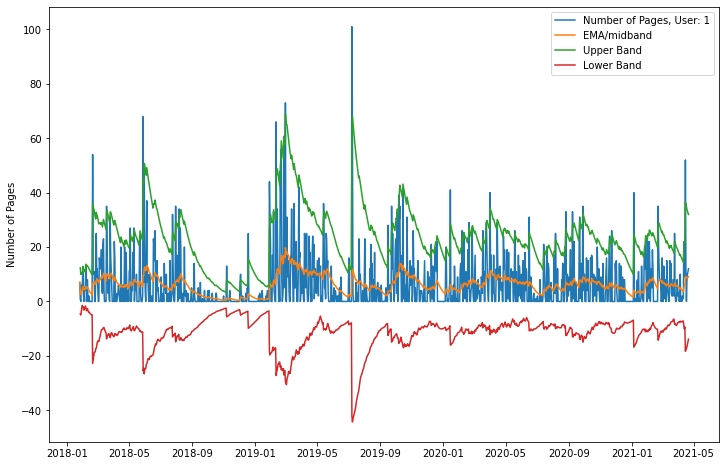

In [46]:
user = 1
span = 30
weight = 2
user_df = find_anomalies(df, user, span, weight, plot=True)

anomalies = pd.DataFrame()
user_df = find_anomalies(df, user, span, weight)
anomalies = pd.concat([anomalies, user_df], axis=0)

In [47]:
def get_cohort_10_paths(cohort, name_path):
    df = name_path[name_path.name == cohort]
    df = df[df.path != 'toc']
    df = df[df.path != '/']
    df = df[df.path != 'search/search_index.json']
    print(f'{cohort} top 10 lessons accessed:\n')
    return print(df.path.value_counts().head(10))

In [48]:
name_path = df[['name','path', 'program_name']]

In [49]:
name_list = df.name.to_list()
name_list

['Hampton',
 'Hampton',
 'Hampton',
 'Hampton',
 'Teddy',
 'Teddy',
 'Teddy',
 'Teddy',
 'Teddy',
 'Teddy',
 'Teddy',
 'Teddy',
 'Teddy',
 'Teddy',
 'Teddy',
 'Teddy',
 'Teddy',
 'Teddy',
 'Teddy',
 'Teddy',
 'Teddy',
 'Teddy',
 'Teddy',
 'Sequoia',
 'Sequoia',
 'Sequoia',
 'Sequoia',
 'Teddy',
 'Teddy',
 'Teddy',
 'Arches',
 'Arches',
 'Teddy',
 'Arches',
 'Teddy',
 'Teddy',
 'Teddy',
 'Teddy',
 'Teddy',
 'Sequoia',
 'Sequoia',
 'Teddy',
 'Teddy',
 'Teddy',
 'Teddy',
 'Teddy',
 'Teddy',
 'Teddy',
 'Teddy',
 'Teddy',
 'Sequoia',
 'Sequoia',
 'Sequoia',
 'Sequoia',
 'Sequoia',
 'Sequoia',
 'Teddy',
 'Teddy',
 'Hampton',
 'Teddy',
 'Teddy',
 'Teddy',
 'Teddy',
 'Teddy',
 'Teddy',
 'Teddy',
 'Teddy',
 'Teddy',
 'Teddy',
 'Teddy',
 'Teddy',
 'Teddy',
 'Niagara',
 'Niagara',
 'Teddy',
 'Teddy',
 'Teddy',
 'Teddy',
 'Sequoia',
 'Sequoia',
 'Sequoia',
 'Sequoia',
 'Teddy',
 'Teddy',
 'Teddy',
 'Teddy',
 'Teddy',
 'Sequoia',
 'Sequoia',
 'Teddy',
 'Hampton',
 'Teddy',
 'Teddy',
 'Teddy',
 'Ted

In [50]:
for i in name_list:
    print(i)
    get_cohort_10_paths(i,name_path)

Hampton
Hampton top 10 lessons accessed:

java-iii                 57
appendix                 55
java-ii                  46
java-i                   46
spring                   43
javascript-i             36
javascript-ii            31
java-iii/servlets        30
mysql                    30
java-iii/jsp-and-jstl    27
Name: path, dtype: int64
Hampton
Hampton top 10 lessons accessed:

java-iii                 57
appendix                 55
java-ii                  46
java-i                   46
spring                   43
javascript-i             36
javascript-ii            31
java-iii/servlets        30
mysql                    30
java-iii/jsp-and-jstl    27
Name: path, dtype: int64
Hampton
Hampton top 10 lessons accessed:

java-iii                 57
appendix                 55
java-ii                  46
java-i                   46
spring                   43
javascript-i             36
javascript-ii            31
java-iii/servlets        30
mysql                    30
java-iii/jsp

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii   

Hampton top 10 lessons accessed:

java-iii                 57
appendix                 55
java-ii                  46
java-i                   46
spring                   43
javascript-i             36
javascript-ii            31
java-iii/servlets        30
mysql                    30
java-iii/jsp-and-jstl    27
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii         

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Arches top 10 lessons accessed:

javascript-i                 294
html-css                     215
javascript-ii                204
spring                       192
java-ii                      167
java-iii                     153
appendix                     133
jquery                       133
java-i                       132
spring/fundamentals/views     98
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Arches
Arches top 10 lessons accessed:

javascript-i                 294
html-css                     215
javascript-ii                204
spring                       192
java-ii                      167
java-iii                     153
appendix                     133
jquery                       133
java-i                       132
spring/fundamentals/views     98
Name: path, dtype: int64
Arches
Arches top 10 lessons accessed:

javascript-i                 294
html-css                     215
javascript-ii                204
spring                       192
java-ii                      167
java-iii                     153
appendix              

Quincy top 10 lessons accessed:

content/laravel/intro                               38
content/html-css                                    33
content/laravel/intro/environment.html              31
content/laravel/intro/application-structure.html    20
content/mysql/intro-to-mysql                        19
content/php_iii                                     19
javascript-i/conditionals                           16
content/php_iii/php-with-html                       15
java-i                                              14
content/appendix                                    14
Name: path, dtype: int64
Quincy
Quincy top 10 lessons accessed:

content/laravel/intro                               38
content/html-css                                    33
content/laravel/intro/environment.html              31
content/laravel/intro/application-structure.html    20
content/mysql/intro-to-mysql                        19
content/php_iii                                     19
javascript-i/condition

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamen

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring  

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii   

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Kings top 10 lessons accessed:

index.html                                              84
content/laravel/intro                                   83
content/laravel/intro/application-structure.html        63
content/laravel/intro/gitbook/images/favicon.ico        56
content/php_iii                                         47
content/html-css                                        45
content/php_iv                                          42
content/php_ii                                          40
content/laravel/quickstart/db-migrations.html           40
content/laravel/quickstart/resource-controllers.html    39
Name: path, dtype: int64
Kings
Kings top 10 lessons accessed:

index.html                                              84
content/laravel/intro                                   83
content/laravel/intro/application-structure.html        63
content/laravel/intro/gitbook/images/favicon.ico        56
content/php_iii                                         47
content/html-css    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers              

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring    

Kings top 10 lessons accessed:

index.html                                              84
content/laravel/intro                                   83
content/laravel/intro/application-structure.html        63
content/laravel/intro/gitbook/images/favicon.ico        56
content/php_iii                                         47
content/html-css                                        45
content/php_iv                                          42
content/php_ii                                          40
content/laravel/quickstart/db-migrations.html           40
content/laravel/quickstart/resource-controllers.html    39
Name: path, dtype: int64
Kings
Kings top 10 lessons accessed:

index.html                                              84
content/laravel/intro                                   83
content/laravel/intro/application-structure.html        63
content/laravel/intro/gitbook/images/favicon.ico        56
content/php_iii                                         47
content/html-css    

Kings top 10 lessons accessed:

index.html                                              84
content/laravel/intro                                   83
content/laravel/intro/application-structure.html        63
content/laravel/intro/gitbook/images/favicon.ico        56
content/php_iii                                         47
content/html-css                                        45
content/php_iv                                          42
content/php_ii                                          40
content/laravel/quickstart/db-migrations.html           40
content/laravel/quickstart/resource-controllers.html    39
Name: path, dtype: int64
Kings
Kings top 10 lessons accessed:

index.html                                              84
content/laravel/intro                                   83
content/laravel/intro/application-structure.html        63
content/laravel/intro/gitbook/images/favicon.ico        56
content/php_iii                                         47
content/html-css    

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers              

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Kings
Kings top 10 lessons accessed:

index.html                                              84
content/laravel/intro                                   83
content/laravel/intro/application-structure.html        63
content/laravel/intro/gitbook/images/favicon.ico        56
content/php_iii                                         47
content/html-css                                        45
content/php_iv                                          42
content/php_ii                                          40
content/laravel/quickstart/db-migrations.html           40
content/laravel/quickstart/resource-controllers.html  

Kings top 10 lessons accessed:

index.html                                              84
content/laravel/intro                                   83
content/laravel/intro/application-structure.html        63
content/laravel/intro/gitbook/images/favicon.ico        56
content/php_iii                                         47
content/html-css                                        45
content/php_iv                                          42
content/php_ii                                          40
content/laravel/quickstart/db-migrations.html           40
content/laravel/quickstart/resource-controllers.html    39
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdoc

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring    

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
None
None top 10 lessons accessed:

Series([], Name: path, dtype: int64)
None
None top 10 lessons accessed:

Series([], Name: path, dtype: int64)
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring  

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spri

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Niagara top 10 lessons accessed:

spring           65
index.html       63
java-iii         29
mysql            24
javascript-i     23
javascript-ii    21
appendix         20
java-i           18
java-ii          17
spring/setup     13
Name: path, dtype: int64
Niagara
Niagara top 10 lessons accessed:

spring           65
index.html       63
java-iii         29
mysql            24
javascript-i     23
javascript-ii    21
appendix         20
java-i           18
java-ii          17
spring/setup     13
Name: path, dtype: int64
Niagara
Niagara top 10 lessons accessed:

spring           65
index.html       63
java-iii         29
mysql            24
javascript-i     23
javascript-ii    21
appendix         20
java-i           18
java-ii          17
spring/setup     13
Name: path, dtype: int64
Niagara
Niagara top 10 lessons accessed:

spring           65
index.html       63
java-iii         29
mysql            24
javascript-i     23
javascript-ii    21
appendix         20
java-i           18
java-

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers              

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
None
None top 10 lessons accessed:

Series([], Name: path, dtype: int64)
None
None top 10 lessons accessed:

Series([], Name: path, dtype: int64)
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Niagara
Niagara top 10 lessons accessed:

spring           65
index.html       63
java-iii         29
mysql            24
javascript-i     23
javascript-ii    21
appendix         20
java-i           18
java-ii          17
spring/setup     13
Name: path, dtype: int64
Niagara
Niagara top 10 lessons accessed:

spring           65
index.html       63
java-iii         29
mysql            24
javascript-i     23
javascript-ii    21
appendix         20
java-i           18
java-ii          17
spring/setup     13
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql              

Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authenticati

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers              

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Lassen
Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174


Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spri

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Hampton
Hampton top 10 lessons accessed:

java-iii                 57
appendix                 55
java-ii                  46
java-i                   46
spring                   43
javascript-i             36
javascript-ii            31
java-iii/servlets        30
mysql                    30
java-iii/jsp-and-jstl    27
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii      

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spri

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Pinnacles
Pinnacles top 10 lessons accessed:

javascript-i         69
javascript-ii        58
html-css             56
spring               56
java-i               54
javascript-ii/npm    51
java-ii              50
java-iii             45
mysql                39
index.html           36
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix          

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers              

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Arches
Arches top 10 lessons accessed:

javascript-i                 294
html-css                     215
javascript-ii                204
spring                       192
java-ii                      167
java-iii                     153
appendix                     133
jquery                       133
java-i                       132
spring/fundamentals/views     98
Name: path, dtype: int64
Arches
Arches top 10 lessons accesse

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Hampton top 10 lessons accessed:

java-iii                 57
appendix                 55
java-ii                  46
java-i                   46
spring                   43
javascript-i             36
javascript-ii            31
java-iii/servlets        30
mysql                    30
java-iii/jsp-and-jstl    27
Name: path, dtype: int64
Lassen
Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Lassen
Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Pinnacles
Pinnacles top 10 lessons accessed:

javascript-i         69
javascript-ii        58
html-css             56
spring               56
java-i               54
javascript-ii/npm    51
java-ii              50
java-iii             45
my

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Kings top 10 lessons accessed:

index.html                                              84
content/laravel/intro                                   83
content/laravel/intro/application-structure.html        63
content/laravel/intro/gitbook/images/favicon.ico        56
content/php_iii                                         47
content/html-css                                        45
content/php_iv                                          42
content/php_ii                                          40
content/laravel/quickstart/db-migrations.html           40
content/laravel/quickstart/resource-controllers.html    39
Name: path, dtype: int64
Kings
Kings top 10 lessons accessed:

index.html                                              84
content/laravel/intro                                   83
content/laravel/intro/application-structure.html        63
content/laravel/intro/gitbook/images/favicon.ico        56
content/php_iii                                         47
content/html-css    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers              

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
None
None top 10 lessons accessed:

Series([], Name: path, dtype: int64)
None
None top 10 lessons accessed:

Series([], Name: path, dtype: int64)
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                

Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Lassen
Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Lassen
Lassen top 10 lessons accessed:

index.html                          8

Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Lassen
Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-ii

Quincy top 10 lessons accessed:

content/laravel/intro                               38
content/html-css                                    33
content/laravel/intro/environment.html              31
content/laravel/intro/application-structure.html    20
content/mysql/intro-to-mysql                        19
content/php_iii                                     19
javascript-i/conditionals                           16
content/php_iii/php-with-html                       15
java-i                                              14
content/appendix                                    14
Name: path, dtype: int64
Quincy
Quincy top 10 lessons accessed:

content/laravel/intro                               38
content/html-css                                    33
content/laravel/intro/environment.html              31
content/laravel/intro/application-structure.html    20
content/mysql/intro-to-mysql                        19
content/php_iii                                     19
javascript-i/condition

Hampton top 10 lessons accessed:

java-iii                 57
appendix                 55
java-ii                  46
java-i                   46
spring                   43
javascript-i             36
javascript-ii            31
java-iii/servlets        30
mysql                    30
java-iii/jsp-and-jstl    27
Name: path, dtype: int64
Hampton
Hampton top 10 lessons accessed:

java-iii                 57
appendix                 55
java-ii                  46
java-i                   46
spring                   43
javascript-i             36
javascript-ii            31
java-iii/servlets        30
mysql                    30
java-iii/jsp-and-jstl    27
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix            

Pinnacles top 10 lessons accessed:

javascript-i         69
javascript-ii        58
html-css             56
spring               56
java-i               54
javascript-ii/npm    51
java-ii              50
java-iii             45
mysql                39
index.html           36
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix           

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Mammoth
Mammoth top 10 lessons accessed:

java-i                                       19
java-iii                                     13
spring                                       12
spring/fundamentals/controllers              12
spring/fundamentals/views                    11
javascript-ii                                10
java-ii                                      10
content/php_i                                 9
content/php_i/intro-via-interactive-shell     9
mysql/introduction                            9
Name: path, dtype: int64
Mammoth
Mammoth top 10 lessons accessed:

java-i                            

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spri

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers              

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring    

Quincy top 10 lessons accessed:

content/laravel/intro                               38
content/html-css                                    33
content/laravel/intro/environment.html              31
content/laravel/intro/application-structure.html    20
content/mysql/intro-to-mysql                        19
content/php_iii                                     19
javascript-i/conditionals                           16
content/php_iii/php-with-html                       15
java-i                                              14
content/appendix                                    14
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Sequoia
S

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spri

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Arches
Arches top 10 lessons accessed:

javascript-i                 294
html-css                     215
javascript-ii                204
spring                       192
java-ii                      167
java-iii                     153
appendix                     133
jquery                       133
java-i                       132
spring/fundamentals/views     98
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spri

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spri

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spri

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i             

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Arches
Arches top 10 lessons accessed:

javascript-i                 294
html-css                     215
javascript-ii                204
spring                       192
java-ii                      167
java-iii                     153
appendix                     133
jquery                       133
java-i                       132
spring/fundamentals/views     98
Name: path, dtype: int64
Arches
Arches top 10 lessons accesse

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers              

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spri

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Glacier top 10 lessons accessed:

content/html-css                                                             29
javascript-i/introduction/working-with-data-types-operators-and-variables    24
html-css                                                                     21
javascript-i/functions                                                       20
content/html-css/introduction.html                                           20
javascript-i/introduction/variables                                          19
javascript-i/introduction/operators                                          18
javascript-i/conditionals                                                    16
html-css/introduction                                                        14
javascript-i/javascript-with-html                                            14
Name: path, dtype: int64
Glacier
Glacier top 10 lessons accessed:

content/html-css                                                             29
javascript-i/introd

Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authenticati

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Lassen
Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-ii

Kings top 10 lessons accessed:

index.html                                              84
content/laravel/intro                                   83
content/laravel/intro/application-structure.html        63
content/laravel/intro/gitbook/images/favicon.ico        56
content/php_iii                                         47
content/html-css                                        45
content/php_iv                                          42
content/php_ii                                          40
content/laravel/quickstart/db-migrations.html           40
content/laravel/quickstart/resource-controllers.html    39
Name: path, dtype: int64
Kings
Kings top 10 lessons accessed:

index.html                                              84
content/laravel/intro                                   83
content/laravel/intro/application-structure.html        63
content/laravel/intro/gitbook/images/favicon.ico        56
content/php_iii                                         47
content/html-css    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
None
None top 10 lessons accessed:

Series([], Name: path, dtype: int64)
None
None top 10 lessons accessed:

Series([], Name: path, dtype: int64)
None
None top 10 lessons accessed:

Series([], Name: path, dtype: int64)
None
None top 10 lessons accessed:

Series([], Name: path, dtype: int64)
None
None top 10 lessons accessed:

Series([], Name: path, dtype: int64)
None
None top 10 lessons accessed:

Series([], Name: path, dtype: int64)
None
None top 10 lessons accessed:

Series([], Name: path, dtype: int64)
None
None top 10 lessons accessed:

Series([], Name: path, dtype: int64)
None
None top 10 lessons accessed:

Ser

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Niagara top 10 lessons accessed:

spring           65
index.html       63
java-iii         29
mysql            24
javascript-i     23
javascript-ii    21
appendix         20
java-i           18
java-ii          17
spring/setup     13
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i        

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Lassen
Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers              

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Arches
Arches top 10 lessons accessed:

javascript-i                 294
html-css                     215
javascript-ii                204
spring                       192
java-ii                      167
java-iii                     153
appendix                     133
jquery                       133
java-i                       132
spring/fundamentals/views     98
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      52

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spri

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Lassen
Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                  

Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Lassen
Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Lassen
Lassen top 10 lessons accessed:

index.html                          8

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i             

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Lassen
Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Lassen
Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            22

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii   

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Lassen
Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174


Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Lassen
Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-ii

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Pinnacles top 10 lessons accessed:

javascript-i         69
javascript-ii        58
html-css             56
spring               56
java-i               54
javascript-ii/npm    51
java-ii              50
java-iii             45
mysql                39
index.html           36
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix              

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
None
None top 10 lessons accessed:

Series([], Name: path, dtype: int64)
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487


Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Arches
Arches top 10 lessons accessed:

javascript-i                 294
html-css                     215
javascript-ii                204
spring                       192
java-ii                      167
java-iii                     153
ap

Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
None
None top 10 lessons accessed:

Series([], Name: path, dtype: int64)
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
None
None top 10 lessons accessed:

Series([], Name: path, dtype: int64)
Lassen
Lassen

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii   

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Lassen
Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Lassen
Lassen top 10 lessons accessed:

index.html                          8

Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Lassen
Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Lassen
Lassen top 10 lessons accessed:

index.html                          8

Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Lassen
Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Lassen
Lassen top 10 lessons accessed:

index.html                          8

Kings top 10 lessons accessed:

index.html                                              84
content/laravel/intro                                   83
content/laravel/intro/application-structure.html        63
content/laravel/intro/gitbook/images/favicon.ico        56
content/php_iii                                         47
content/html-css                                        45
content/php_iv                                          42
content/php_ii                                          40
content/laravel/quickstart/db-migrations.html           40
content/laravel/quickstart/resource-controllers.html    39
Name: path, dtype: int64
Kings
Kings top 10 lessons accessed:

index.html                                              84
content/laravel/intro                                   83
content/laravel/intro/application-structure.html        63
content/laravel/intro/gitbook/images/favicon.ico        56
content/php_iii                                         47
content/html-css    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers              

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring  

Pinnacles top 10 lessons accessed:

javascript-i         69
javascript-ii        58
html-css             56
spring               56
java-i               54
javascript-ii/npm    51
java-ii              50
java-iii             45
mysql                39
index.html           36
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Pinnacles
Pinnacles top 10 lessons accessed:

javascript-i         69
javascript-ii        58
html-css             56
spring               56
java-i               54
javascript-ii/npm    51
java-ii              50
java-iii             45
mysql                39
index.html           36
Name: path, dtype: int64
Teddy

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers              

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Denali
Denali top 10 lessons accessed:

mkdocs/search_index.json     1
prework/databases            1
prework/versioning/github    1
Name: path, dtype: int64
Denali
Denali top 10 lessons accessed:

mkdocs/search_index.json     1
prework/databases            1
prework/versioning/github    1
Name: path, dtype: int64
Denali
Denali top 10 lessons accessed:

mkdocs/search_index.json     1
prework/databases            1
prework/versioning/github    1
Name: path, dtype: int64
Denali
Denali top 10 lessons accessed:

mkdocs/search_index.json     1
prework/databases            1
prework/versioning/github    1
Name: path, dtype: int64
Teddy
Teddy top 10 less

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers              

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i             

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring  

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers              

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spri

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Lassen
Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174


Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring    

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                              

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring    

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Quincy top 10 lessons accessed:

content/laravel/intro                               38
content/html-css                                    33
content/laravel/intro/environment.html              31
content/laravel/intro/application-structure.html    20
content/mysql/intro-to-mysql                        19
content/php_iii                                     19
javascript-i/conditionals                           16
content/php_iii/php-with-html                       15
java-i                                              14
content/appendix                                    14
Name: path, dtype: int64
Quincy
Quincy top 10 lessons accessed:

content/laravel/intro                               38
content/html-css                                    33
content/laravel/intro/environment.html              31
content/laravel/intro/application-structure.html    20
content/mysql/intro-to-mysql                        19
content/php_iii                                     19
javascript-i/condition

Quincy top 10 lessons accessed:

content/laravel/intro                               38
content/html-css                                    33
content/laravel/intro/environment.html              31
content/laravel/intro/application-structure.html    20
content/mysql/intro-to-mysql                        19
content/php_iii                                     19
javascript-i/conditionals                           16
content/php_iii/php-with-html                       15
java-i                                              14
content/appendix                                    14
Name: path, dtype: int64
Quincy
Quincy top 10 lessons accessed:

content/laravel/intro                               38
content/html-css                                    33
content/laravel/intro/environment.html              31
content/laravel/intro/application-structure.html    20
content/mysql/intro-to-mysql                        19
content/php_iii                                     19
javascript-i/condition

Quincy top 10 lessons accessed:

content/laravel/intro                               38
content/html-css                                    33
content/laravel/intro/environment.html              31
content/laravel/intro/application-structure.html    20
content/mysql/intro-to-mysql                        19
content/php_iii                                     19
javascript-i/conditionals                           16
content/php_iii/php-with-html                       15
java-i                                              14
content/appendix                                    14
Name: path, dtype: int64
Quincy
Quincy top 10 lessons accessed:

content/laravel/intro                               38
content/html-css                                    33
content/laravel/intro/environment.html              31
content/laravel/intro/application-structure.html    20
content/mysql/intro-to-mysql                        19
content/php_iii                                     19
javascript-i/condition

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Pinnacles
Pinnacles top 10 lessons accessed:

javascript-i         69
javascript-ii        58
html-css             56
spring               56
java-i               54
javascript-ii/npm    51
java-ii              50
java-iii             45
my

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spri

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring    

Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Lassen
Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Lassen
Lassen top 10 lessons accessed:

index.html                          8

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Arches top 10 lessons accessed:

javascript-i                 294
html-css                     215
javascript-ii                204
spring                       192
java-ii                      167
java-iii                     153
appendix                     133
jquery                       133
java-i                       132
spring/fundamentals/views     98
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring    

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring    

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
None
None top 10 lessons accessed:

Series([], Name: path, dtype: int64)
None
None top 10 lessons accessed:

Series([], Name: path, dtype: int64)
None
None top 10 lessons accessed:

Series([], Name: path, dtype: int64)
None
None top 10 lessons accessed:

Series([], Name: path, dtype: int64)
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javas

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
None
None top 10 lessons accessed:

Series([], Name: path, dtype: int64)
None
None top 10 lessons accessed:

Series([], Name: path, dtype: int64)
None
None top 10 lessons accessed:

Series([], Name: path, dtype: int64)
None
None top 10 less

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Series([], Name: path, dtype: int64)
None
None top 10 lessons accessed:

Series([], Name: path, dtype: int64)
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix        

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers              

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii   

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Niagara top 10 lessons accessed:

spring           65
index.html       63
java-iii         29
mysql            24
javascript-i     23
javascript-ii    21
appendix         20
java-i           18
java-ii          17
spring/setup     13
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Niagara
Niagara top 10 lessons accessed:

spring           65
index.html       63
java-iii         29
mysql            24
javascript-i     23
javascript-ii    21
ap

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Arches top 10 lessons accessed:

javascript-i                 294
html-css                     215
javascript-ii                204
spring                       192
java-ii                      167
java-iii                     153
appendix                     133
jquery                       133
java-i                       132
spring/fundamentals/views     98
Name: path, dtype: int64
Lassen
Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Lassen
Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                   

Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Lassen
Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Lassen
Lassen top 10 lessons accessed:

index.html                          8

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Lassen
Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Lassen
Lassen top 10 lessons accessed:

index.html                          8

Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Lassen
Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Lassen
Lassen top 10 lessons accessed:

index.html                          8

Hampton top 10 lessons accessed:

java-iii                 57
appendix                 55
java-ii                  46
java-i                   46
spring                   43
javascript-i             36
javascript-ii            31
java-iii/servlets        30
mysql                    30
java-iii/jsp-and-jstl    27
Name: path, dtype: int64
Hampton
Hampton top 10 lessons accessed:

java-iii                 57
appendix                 55
java-ii                  46
java-i                   46
spring                   43
javascript-i             36
javascript-ii            31
java-iii/servlets        30
mysql                    30
java-iii/jsp-and-jstl    27
Name: path, dtype: int64
Arches
Arches top 10 lessons accessed:

javascript-i                 294
html-css                     215
javascript-ii                204
spring                       192
java-ii                      167
java-iii                     153
appendix                     133
jquery                       133
java-i    

Hampton top 10 lessons accessed:

java-iii                 57
appendix                 55
java-ii                  46
java-i                   46
spring                   43
javascript-i             36
javascript-ii            31
java-iii/servlets        30
mysql                    30
java-iii/jsp-and-jstl    27
Name: path, dtype: int64
Hampton
Hampton top 10 lessons accessed:

java-iii                 57
appendix                 55
java-ii                  46
java-i                   46
spring                   43
javascript-i             36
javascript-ii            31
java-iii/servlets        30
mysql                    30
java-iii/jsp-and-jstl    27
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix         

Hampton top 10 lessons accessed:

java-iii                 57
appendix                 55
java-ii                  46
java-i                   46
spring                   43
javascript-i             36
javascript-ii            31
java-iii/servlets        30
mysql                    30
java-iii/jsp-and-jstl    27
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                    

Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Lassen
Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Lassen
Lassen top 10 lessons accessed:

index.html                          8

Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Lassen
Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Lassen
Lassen top 10 lessons accessed:

index.html                          8

Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Lassen
Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Lassen
Lassen top 10 lessons accessed:

index.html                          8

Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Lassen
Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Lassen
Lassen top 10 lessons accessed:

index.html                          8

Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Lassen
Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Lassen
Lassen top 10 lessons accessed:

index.html                          8

Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Lassen
Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Lassen
Lassen top 10 lessons accessed:

index.html                          8

Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Lassen
Lassen top 10 lessons accessed:

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
spring/fundamentals/repositories    115
javascript-ii                       107
Name: path, dtype: int64
Lassen
Lassen top 10 lessons accessed:

index.html                          8

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
None
None top 10 lessons accessed:

Series([], Name: path, dtype: int64)
None
None top 10 lessons accessed:

Series([], Name: path, dtype: int64)
None
None top 10 lessons accessed:

Series([], Name: path, dtype: int64)
None
None top 10 less

Pinnacles top 10 lessons accessed:

javascript-i         69
javascript-ii        58
html-css             56
spring               56
java-i               54
javascript-ii/npm    51
java-ii              50
java-iii             45
mysql                39
index.html           36
Name: path, dtype: int64
None
None top 10 lessons accessed:

Series([], Name: path, dtype: int64)
Pinnacles
Pinnacles top 10 lessons accessed:

javascript-i         69
javascript-ii        58
html-css             56
spring               56
java-i               54
javascript-ii/npm    51
java-ii              50
java-iii             45
mysql                39
index.html           36
Name: path, dtype: int64
Pinnacles
Pinnacles top 10 lessons accessed:

javascript-i         69
javascript-ii        58
html-css             56
spring               56
java-i               54
javascript-ii/npm    51
java-ii              50
java-iii             45
mysql                39
index.html           36
Name: path, dtype: int64
Pinn

Pinnacles top 10 lessons accessed:

javascript-i         69
javascript-ii        58
html-css             56
spring               56
java-i               54
javascript-ii/npm    51
java-ii              50
java-iii             45
mysql                39
index.html           36
Name: path, dtype: int64
Pinnacles
Pinnacles top 10 lessons accessed:

javascript-i         69
javascript-ii        58
html-css             56
spring               56
java-i               54
javascript-ii/npm    51
java-ii              50
java-iii             45
mysql                39
index.html           36
Name: path, dtype: int64
Pinnacles
Pinnacles top 10 lessons accessed:

javascript-i         69
javascript-ii        58
html-css             56
spring               56
java-i               54
javascript-ii/npm    51
java-ii              50
java-iii             45
mysql                39
index.html           36
Name: path, dtype: int64
Pinnacles
Pinnacles top 10 lessons accessed:

javascript-i         69
javascr

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spri

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spri

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery    

Pinnacles top 10 lessons accessed:

javascript-i         69
javascript-ii        58
html-css             56
spring               56
java-i               54
javascript-ii/npm    51
java-ii              50
java-iii             45
mysql                39
index.html           36
Name: path, dtype: int64
Arches
Arches top 10 lessons accessed:

javascript-i                 294
html-css                     215
javascript-ii                204
spring                       192
java-ii                      167
java-iii                     153
appendix                     133
jquery                       133
java-i                       132
spring/fundamentals/views     98
Name: path, dtype: int64
Arches
Arches top 10 lessons accessed:

javascript-i                 294
html-css                     215
javascript-ii                204
spring                       192
java-ii                      167
java-iii                     153
appendix                     133
jquery                       133


Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                        

Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers              

Sequoia top 10 lessons accessed:

spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
mkdocs/search_index.json                       168
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: path, dtype: int64
Teddy
Teddy top 10 lessons accessed:

spring                      744
java-iii                    732
mysql                       638
javascript-i                615
mkdocs/search_index.json    595
java-i                      522
jquery                      512
java-ii                     509
appendix                    505
javascript-ii               487
Name: path, dtype: int64
Sequoia
Sequoia top 10 lessons accessed:

spring

KeyboardInterrupt: 